<a href="https://colab.research.google.com/github/Sitananvor/DL_Practice/blob/main/01_Image_Classification_CNN_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import library & modelu

In [ ]:
#import library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#import modelu from library
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

# Prepare dataset

## Download and prepare CIFAR10 dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
train_images.shape

(50000, 32, 32, 3)

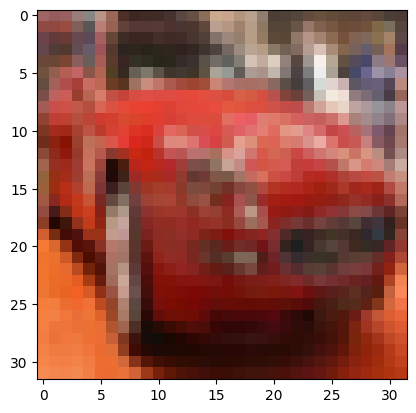

In [ ]:
plt.imshow(train_images[5]) #

## Normalize pixel values to be between 0 and 1

In [ ]:
train_images, test_images = train_images/255, test_images/255

In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
train_images[5]

array([[[0.62352941, 0.4       , 0.39607843],
        [0.58823529, 0.35686275, 0.37254902],
        [0.6       , 0.37254902, 0.38039216],
        ...,
        [0.35686275, 0.27843137, 0.21960784],
        [0.29019608, 0.24705882, 0.21568627],
        [0.29803922, 0.22745098, 0.21568627]],

       [[0.55686275, 0.29411765, 0.26666667],
        [0.57254902, 0.28235294, 0.25882353],
        [0.60784314, 0.29803922, 0.25490196],
        ...,
        [0.49803922, 0.41176471, 0.27843137],
        [0.47843137, 0.43529412, 0.36470588],
        [0.3372549 , 0.27058824, 0.23921569]],

       [[0.42745098, 0.2627451 , 0.29411765],
        [0.38823529, 0.22745098, 0.23529412],
        [0.41176471, 0.23137255, 0.20392157],
        ...,
        [0.5372549 , 0.43921569, 0.31372549],
        [0.63921569, 0.51764706, 0.41176471],
        [0.36470588, 0.28235294, 0.27843137]],

       ...,

       [[0.95686275, 0.50588235, 0.2745098 ],
        [0.94117647, 0.48235294, 0.25490196],
        [0.94509804, 0

In [ ]:
train_labels.shape

(50000, 1)

In [ ]:
train_labels[5]

array([1], dtype=uint8)

## Preprocess Input

In [ ]:
from tensorflow.keras.utils import to_categorical

out_train_labels = to_categorical(train_labels, 10)
out_test_labels = to_categorical(test_labels, 10)

In [ ]:
train_labels[0]

array([6], dtype=uint8)

In [ ]:
out_train_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Verify the data

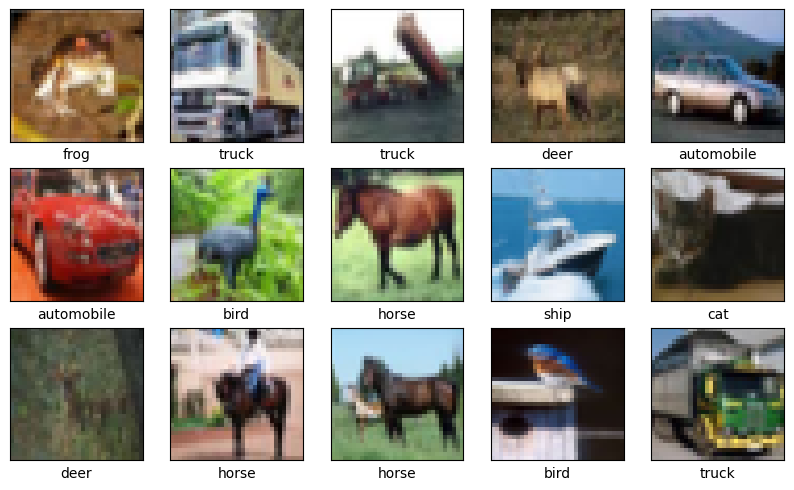

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(15):
  plt.subplot(5,5,i+1)
  plt.xticks([]), plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Model Creation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
# Create Sequential Model
model = models.Sequential()

# Layer 1.1: Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu',)) #ในชั้นแรกใช้ 32 ฟิลเตอร์ เพื่อจับคุณลักษณะพื้นฐานของภาพขนาด 32x32 พิกเซล

# Layer 1.2: Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Layer 2.1: Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(32,32,3), activation='relu',)) #ในชั้นที่สองใช้ 64 ฟิลเตอร์ เพื่อจับคุณลักษณะที่ซับซ้อนขึ้นจากข้อมูลฟีเจอร์แมพส์ที่ได้จากชั้นแรก

# Layer 2.2: Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Layer 3: Flatten Layer
model.add(Flatten())

# Layer 4: Dense Layer (Hidden Layer)
model.add(Dense(256, activation='relu'))

# Layer 5: Dense Layer (Output Layer)
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 256)              

#Loss Function & Optimizer (Compile and train the model)

In [ ]:
model.compile(loss='SparseCategoricalCrossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.1960 - accuracy: 0.9329 - val_loss: 1.3843 - val_accuracy: 0.6921
Epoch 2/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.1572 - accuracy: 0.9453 - val_loss: 1.5114 - val_accuracy: 0.6981
Epoch 3/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.1385 - accuracy: 0.9514 - val_loss: 1.6554 - val_accuracy: 0.6861
Epoch 4/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.1164 - accuracy: 0.9593 - val_loss: 1.6583 - val_accuracy: 0.6952
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.0975 - accuracy: 0.9658 - val_loss: 1.7985 - val_accuracy: 0.6858
Epoch 6/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.1031 - accuracy: 0.9648 - val_loss: 1.9825 - val_accuracy: 0.6898
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.0844 - accuracy: 0.9719 - val_loss: 2.0469 

# Model Evaluation (การประเมินผลโมเดล)

In [ ]:
import pandas as pd

metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.195980,0.93288,1.384303,0.6921
1,0.157164,0.94530,1.511401,0.6981
2,0.138487,0.95136,1.655401,0.6861
3,0.116371,0.95926,1.658327,0.6952
4,0.097524,0.96584,1.798541,0.6858
5,0.103146,0.96478,1.982502,0.6898
6,0.084443,0.97186,2.046870,0.6965
7,0.083739,0.97030,2.129963,0.6940
8,0.082438,0.97184,2.172081,0.6831
9,0.069583,0.97706,2.304043,0.6806


In [ ]:
print(metrics.columns)

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')


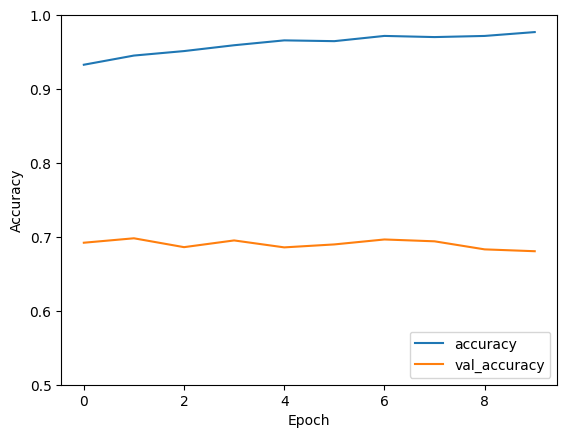

In [ ]:
# plot graph
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch'), plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 4s - loss: 2.3040 - accuracy: 0.6806 - 4s/epoch - 11ms/step


In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
print(classification_report(test_labels, predicted_classes))

313/313 [==============================] - 9s 29ms/step
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1000
           1       0.81      0.77      0.79      1000
           2       0.57      0.59      0.58      1000
           3       0.49      0.51      0.50      1000
           4       0.56      0.71      0.63      1000
           5       0.63      0.53      0.58      1000
           6       0.76      0.76      0.76      1000
           7       0.71      0.75      0.73      1000
           8       0.85      0.76      0.80      1000
           9       0.79      0.71      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [ ]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
con_matrix = confusion_matrix(test_labels, predicted_classes)
print(con_matrix)

313/313 [==============================] - 6s 18ms/step
[[705  17  81  31  42  11   9  22  51  31]
 [ 26 772  24  17  13   7  14  10  24  93]
 [ 55   7 593  66 119  48  65  34   6   7]
 [ 20   6  78 508 109 138  62  57   8  14]
 [ 15   6  73  61 715  22  44  55   8   1]
 [  9   2  62 213  82 534  28  63   4   3]
 [  6   7  48  71  63  20 760  13  10   2]
 [ 11   5  36  36 102  45   4 749   1  11]
 [ 89  31  33  22  22   9   7   7 756  24]
 [ 43  95  20  21  15  16  11  39  26 714]]


In [ ]:
print(test_acc)

0.6805999875068665


# การนำโมเดลไปใช้งาน

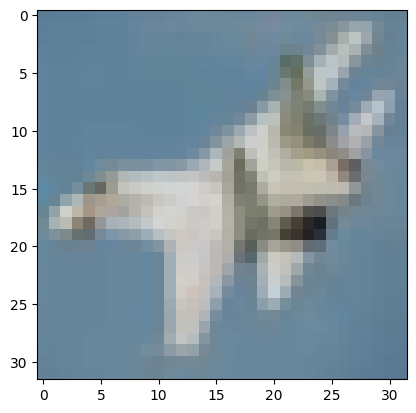

In [ ]:
from tensorflow.keras.datasets import cifar10

(in_train, out_train), (in_test, out_test) = cifar10.load_data()
my_image = in_test[10]
plt.imshow(my_image)

In [ ]:
prediction = model.predict(my_image.reshape(1, 32, 32, 3))
predicted_class = np.argmax(prediction, axis=1)
print("Predicted class:", prediction[0])

1/1 [==============================] - 1s 699ms/step
Predicted class: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
